# Homework 1

Brandon Hawkins

# Dataset 1: CSV

# Downloading Data
    
    The first data set I decided to use is a CSV file from Kaggle. The data shows how different bottles of wine were rated by wine testers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#retrieving data set
wine_stats = pd.read_csv("/Users/brandonhawkins/Downloads/winehw1aml.zip") 

# Clean Data

I will now look at the first five data entries to see what the data looks like and see all of the variables included in the data.

In [3]:
#see first five data entries
wine_stats.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In looking at the data I am interested in understanding how the point value given to a bottle of wine effects the price of the wine. To make it easier to work with the data I will delete any unnecesary variables.

In [4]:
#drop variables
wine_stats = wine_stats.drop('designation', axis=1)
wine_stats = wine_stats.drop('province', axis=1)
wine_stats = wine_stats.drop('region_1', axis=1)
wine_stats = wine_stats.drop('region_2', axis=1)
wine_stats = wine_stats.drop('taster_twitter_handle', axis=1)
wine_stats = wine_stats.drop('title', axis=1)
wine_stats = wine_stats.drop('Unnamed: 0', axis=1)

I will now look at the data to see what is in the data set.

In [5]:
#see data set
wine_stats.head(5)

,country,description,points,price,taster_name,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Pinot Noir,Sweet Cheeks


I now want to see if there are other missing entries for other variables.

In [6]:
#see how many are missing
wine_stats.isnull().sum()

country           63
description        0
points             0
price           8996
taster_name    26244
variety            1
winery             0
dtype: int64

There is missing data for country, price, taster name, and one missing data point for wine variety. Since there is only one missing data point for variety, I will go ahead and just drop the data point. The best assumption I can make for prices is that bottles of wine that receiving higher scores (point values) are worth more. Due to this, I will fill in missing price data with the average from it's corresponding point score. The taster name is impossible to find any relationship that will make sense to fill in the missing data, so I will drop those observations. The country name corresponds to the winery so I will leave the country data as is and use the winery as an indicator of where the wine is from.

In [7]:
#find mean price for each point value
points_avg = wine_stats.groupby("points")["price"].mean()
points_avg

points
80      16.372152
81      17.182353
82      18.870767
83      18.237353
84      19.310215
85      19.949562
86      22.133759
87      24.901884
88      28.687523
89      32.169640
90      36.906622
91      43.224252
92      51.037763
93      63.112216
94      81.436938
95     109.235420
96     159.292531
97     207.173913
98     245.492754
99     284.214286
100    485.947368
Name: price, dtype: float64

In [8]:
#replacing missing prices with averages from the same point values
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 80), 'price']= points_avg.loc[80]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 81), 'price']= points_avg.loc[81]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 82), 'price']= points_avg.loc[82]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 83), 'price']= points_avg.loc[83]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 84), 'price']= points_avg.loc[84]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 85), 'price']= points_avg.loc[85]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 86), 'price']= points_avg.loc[86]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 87), 'price']= points_avg.loc[87]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 88), 'price']= points_avg.loc[88]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 89), 'price']= points_avg.loc[89]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 90), 'price']= points_avg.loc[90]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 91), 'price']= points_avg.loc[91]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 92), 'price']= points_avg.loc[92]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 93), 'price']= points_avg.loc[93]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 94), 'price']= points_avg.loc[94]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 95), 'price']= points_avg.loc[95]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 96), 'price']= points_avg.loc[96]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 97), 'price']= points_avg.loc[97]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 98), 'price']= points_avg.loc[98]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 99), 'price']= points_avg.loc[99]
wine_stats.loc[(wine_stats['price'].isnull()) & (wine_stats.points == 100), 'price']= points_avg.loc[100]

In [9]:
#dropped missing variety data point
wine_stats = wine_stats[pd.notnull(wine_stats['variety'])]

In [10]:
#dropping missing taster name data
wine_stats = wine_stats[pd.notnull(wine_stats['taster_name'])]

I will next scale the price and points data to make it easier to work with and identify relationships with.

In [11]:
#Standard Scale the Price and Points
from sklearn.preprocessing import StandardScaler
scaled_features = wine_stats.copy()
scaled_col = ['points', 'price']
features = scaled_features[scaled_col]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [12]:
scaled_features[scaled_col] = features
print(scaled_features)

            country                                        description  \
0             Italy  Aromas include tropical fruit, broom, brimston...   
1          Portugal  This is ripe and fruity, a wine that is smooth...   
2                US  Tart and snappy, the flavors of lime flesh and...   
3                US  Pineapple rind, lemon pith and orange blossom ...   
4                US  Much like the regular bottling from 2012, this...   
5             Spain  Blackberry and raspberry aromas show a typical...   
6             Italy  Here's a bright, informal red that opens with ...   
7            France  This dry and restrained wine offers spice in p...   
8           Germany  Savory dried thyme notes accent sunnier flavor...   
9            France  This has great depth of flavor with its fresh ...   
10               US  Soft, supple plum envelopes an oaky structure ...   
11           France  This is a dry wine, very spicy, with a tight, ...   
12               US  Slightly reduced,

I will now check for outliers in the data

(0, 4000)

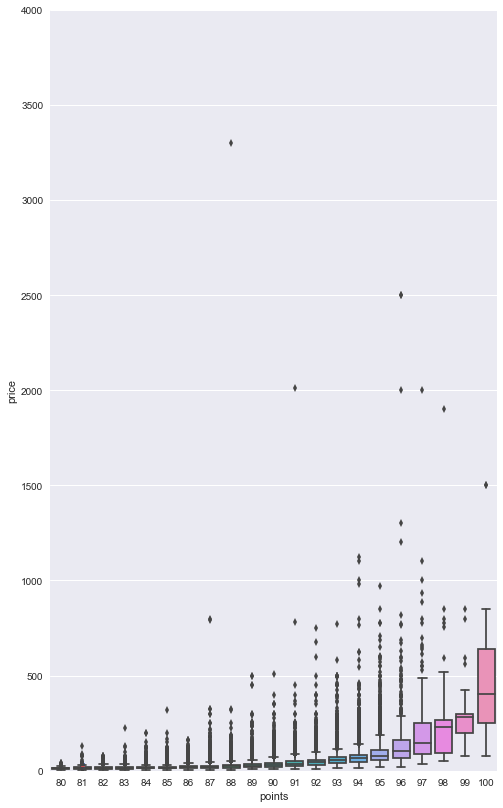

In [46]:
#boxplot
bbox = wine_stats['price'].plot(kind="box")
#scaling
sns.set_style("whitegrid")
ax = sns.boxplot(x="points", y="price", data=wine_stats)
#resizing
sns.set(rc={'figure.figsize':(8, 12)})
#setting range
plt.ylim(0, 4000)

In [14]:
#summary statistics
sum_stats_wine = wine_stats.describe()
sum_stats_wine

,points,price
count,103727.000000,103727.000000
mean,88.612107,35.236719
std,2.955039,42.010532
min,80.000000,4.000000
25%,87.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


It looks like there are many outliers in the data that fall outside the 25%-75% range. In looking at the summary statistics of the data above it seems reasonable that a bottle of wine would be priced as high as the data shows, so I will leave in the data points.

# Describe Data

To help in identifying if there is a relationship between points and price we will look at the summary statistics of price and wine point values received.

In [15]:
#summary statistics
sum_stats_wine

,points,price
count,103727.000000,103727.000000
mean,88.612107,35.236719
std,2.955039,42.010532
min,80.000000,4.000000
25%,87.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [16]:
#percentiles
wine_stats.describe(percentiles=[.01,.05,.95,.99])

,points,price
count,103727.000000,103727.000000
mean,88.612107,35.236719
std,2.955039,42.010532
min,80.000000,4.000000
1%,82.000000,8.000000
5%,84.000000,11.000000
50%,88.000000,25.000000
95%,93.000000,81.436938
99%,95.000000,159.292531
max,100.000000,3300.000000


The first table shows us that there is a wide range of values for wine bottle prices. The maximum price is much higher than the mean. The second table helps us to answer our question of interest. In looking at the percentile values, we can see that the price of wine increases as wine point value increases.

# Visualize Data

We will now look at visual representations of the relationship between wine bottle prices and the point values that they received.

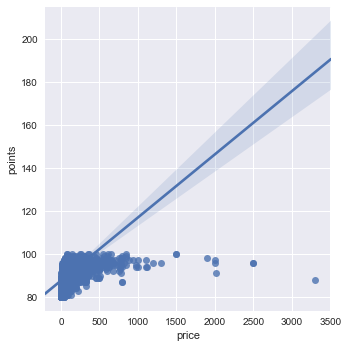

In [17]:
#scatter plot
sns.lmplot(x="price", y="points", data=wine_stats)

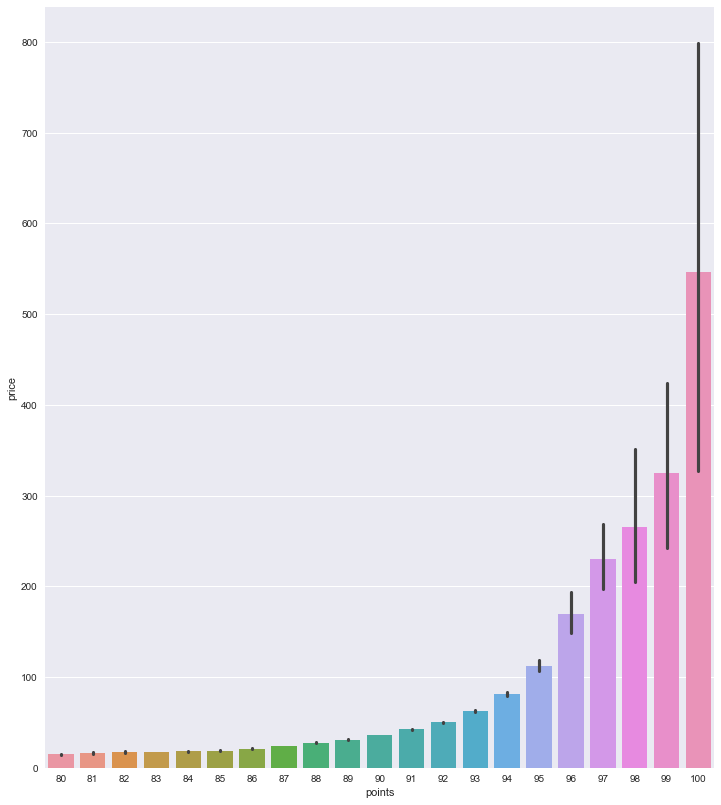

In [18]:
#bar plot
sns.barplot(wine_stats.points, wine_stats.price)

The scatter plot shows that there is a clear positive relationship between our variables of interest. We can also see in the second graph that there is a clear increase in price of wine as point value increases. We can also see that it appears to be a somewhat exponential relationship.

# Data Set 2: .txt
The next data set that I used was from data.gov. It is a .txt file that recorded the CPI's from 1995 to August 2018. I am interested to see if there are certain months that cause the CPI to increase or decrease and if there is any relationship with the CPI and economic recessions and booms.

# Download Data


In [19]:
#download data
CPI_data = pd.read_csv("https://download.bls.gov/pub/time.series/ap/ap.data.0.Current", delimiter = "\t")

I will now look at the first five columns of data to see what it looks like.

In [20]:
#view daata
CPI_data.head(5)

,series_id,year,period,value,footnote_codes
0,APU0000701111,1995,M01,0.238,
1,APU0000701111,1995,M02,0.242,
2,APU0000701111,1995,M03,0.242,
3,APU0000701111,1995,M04,0.236,
4,APU0000701111,1995,M05,0.244,


I now check to see if there is any missing data in the data set.

In [21]:
#check for missing data
CPI_data.isnull().sum()

series_id         0
year              0
period            0
value             0
footnote_codes    0
dtype: int64

I will now look at the summary statistics and plot a box plot to see if there are any outliers.

In [22]:
#summary statistics
sum_stats_CPI = CPI_data.describe()
sum_stats_CPI

,year,value
count,165144.000000,165144.000000
mean,2005.768650,11.047894
std,6.800774,24.956184
min,1995.000000,0.000000
25%,2000.000000,1.189000
50%,2006.000000,2.331000
75%,2011.000000,3.832000
max,2018.000000,224.187000


(0, 275)

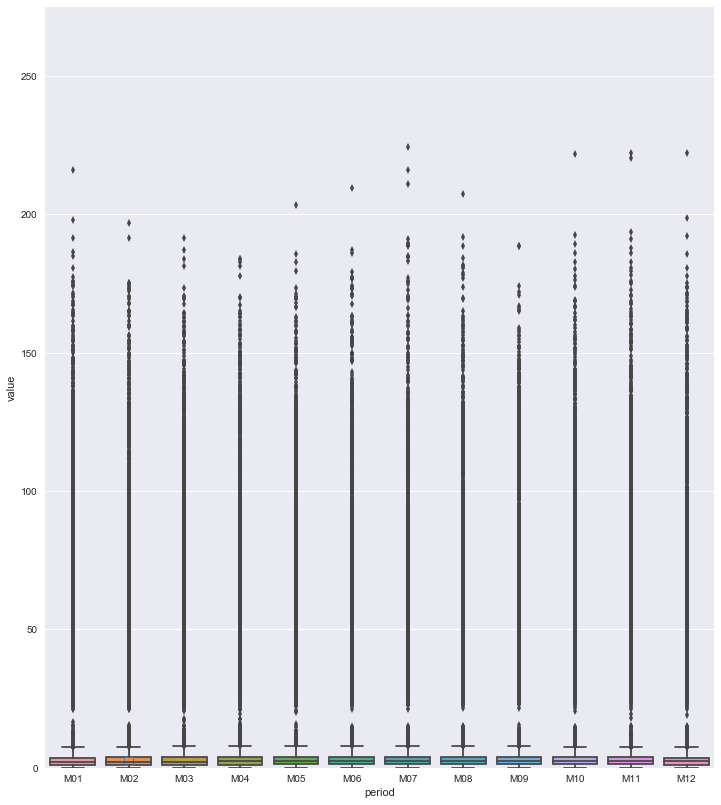

In [23]:
#boxplot
bbox = CPI_data['value'].plot(kind="box")
#scaling
sns.set_style("whitegrid")
ax = sns.boxplot(x="period", y="value", data=CPI_data)
#resizing
sns.set(rc={'figure.figsize':(12, 18)})
#setting range
plt.ylim(0, 275)

There are many outliers in the data and it suprised me that there could be a max CPI value of 224.187. I did furthur research on if this was possible and it is possible to reach that high of a CPI. It simply means that prices doubled. In examining for outliers it seems that all of the data is valid and I will not drop any data due to outliers.

# Describe Data

I will now look at general statistics of the data to get an overall sense of what is happening with the CPI.

In [24]:
#summary statistics
sum_stats_CPI

,year,value
count,165144.000000,165144.000000
mean,2005.768650,11.047894
std,6.800774,24.956184
min,1995.000000,0.000000
25%,2000.000000,1.189000
50%,2006.000000,2.331000
75%,2011.000000,3.832000
max,2018.000000,224.187000


In [25]:
#percentile
perc_CPI = CPI_data.describe(percentiles=[.01,.05,.95,.99])
perc_CPI

,year,value
count,165144.000000,165144.000000
mean,2005.768650,11.047894
std,6.800774,24.956184
min,1995.000000,0.000000
1%,1995.000000,0.084000
5%,1996.000000,0.152000
50%,2006.000000,2.331000
95%,2017.000000,66.479000
99%,2018.000000,121.745700
max,2018.000000,224.187000


This helps us to see that a majority of the CPI_values found in the data are below 2.331. We can also see that extremely high CPI values are an extreme case for this time period.

I will now look to see if there are any relationships between different months of the year and CPI values and different years and CPI values.

In [26]:
#avg CPI by month
CPI_month_avg = CPI_data.groupby("period")["value"].mean()
CPI_month_avg

period
M01    11.185728
M02    11.061507
M03    11.039981
M04    11.058573
M05    11.131108
M06    11.159358
M07    10.732657
M08    10.666333
M09    10.980489
M10    11.088401
M11    11.233913
M12    11.257393
Name: value, dtype: float64

In [27]:
#avg CPI by year
CPI_year_avg = CPI_data.groupby("year")["value"].mean()
CPI_year_avg

year
1995     9.740221
1996     9.773366
1997    10.178626
1998     9.119210
1999     9.202973
2000    10.474468
2001    12.080067
2002    10.910203
2003    12.710991
2004    13.618790
2005    15.714482
2006    16.049112
2007    16.005357
2008    17.746972
2009    15.105921
2010    14.830068
2011    15.007988
2012    14.470437
2013     9.658718
2014     3.068437
2015     2.808523
2016     2.607550
2017     2.714509
2018     2.758879
Name: value, dtype: float64

In looking at this, there seems to be no pattern in CPI and months of the year. Although CPI values do seem to be lower in late summer months it isn't by a significant amount. Otherwise, CPI values hover around 11. However, when comparing the years and values there does seem to be a significant trend. In months leading up to the Great Recession CPI values grow. This shows that the economy was seeing much higher inflation rates. Average CPI values peak in 2007 when the recession hit and decrease until present day. These values do predict what I would expect to see.

# Visualize Data

I will now visualize the relationship between CPI values and years over time.

Text(0,0.5,'CPI Value')

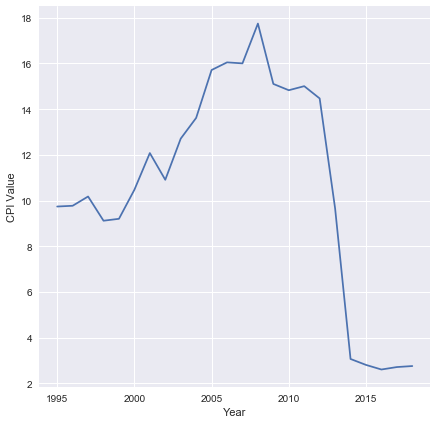

In [60]:
#line plot
plt.plot(CPI_year_avg)
#resize
sns.set(rc={'figure.figsize':(7, 2)})
#label axis
plt.xlabel('Year')
plt.ylabel('CPI Value')

In this graph you can see the relationship between CPI values and years over time.

# Data Set 3: Excel File

For my third data set I decided to use an excel file. A project that I had at work was to record some sales data. The data records the results of an email campaign. It shows who was contacted, their position, whether they accepted a LinkedIn invite, whether the contact resulted in a meeting and what day of the email campaign that the target responded. The question of interest is to see if there are any positive correlations with any of the variables and accepting LinkedIn invites. People who accept LinkedIn invites are more likely to set up a meeting and so it is of interest to determine who is most likely to accept. 

I will now download the data.

In [38]:
#download data
sales = pd.read_excel("/Users/brandonhawkins/Saleshw1.xlsx")

# Clean Data
I will now clean the data to make it easier to work with

In [39]:
#see first five rows of data
sales.head(5)

,Name,Position,Company Name,Accepted LinkedIn,Meeting?,Email # Responded
0,Joe Wright,CEO and Founder,Access Mobility 24,1,Yes,Day 3
1,Steve Sowers,Executive Vice President,Legalinc.com,1,Yes,Day 5
2,Jake Harry,Sales Manager,North State Consulting,0,No,Day 12
3,Lauren Gertske,Director Enterprise Sales,Blue Label Labs Incorporated,1,No,Day 2
4,Scott McRoskey,Director of Sales,MixRank Company,1,No,Day 5


I will now check to see if there is any missing data.

In [41]:
#check for missing data
sales.isnull().sum()

Name                  0
Position             24
Company Name          0
Accepted LinkedIn     0
Meeting?              0
Email # Responded    64
dtype: int64

The only missing data is 24 position entries. It would be impossible for me to find a way to fill in the missing data so I will not have a way to fix it. The data set is also very small so I will not drop the entries either. I will focus my question on a relationship between accepting a LinkedIn invited and when they respond to the email.

I will now check to see what different entries I have for both accepted LinkedIn and Email # Responded to see if I have anything out of the ordinary.

In [42]:
#see different Accepted LinkedIn values
sales['Accepted LinkedIn'].unique()

array([1, 0])

In [34]:
#see different Email # Responded values
sales['Email # Responded'].unique()

array(['Day 3', 'Day 5', 'Day 12', 'Day 2', 'No Response', 'Wrong email',
       'No email', 'Day 15', 'Day 9', 'Wrong Email', 'Not applicable',
       'Blocked Email'], dtype=object)

All of the entries seem to make sense so I do not have to worry about any outliers.

Now that we have cleaned the data set, we can look to see if there are any interesting relationships.

# Describe Data

We will now look at the summary statistics and percentiles to get an overall idea of what the data is telling us.

In [43]:
#summary statistics
sum_stats_sales = sales.describe()
sum_stats_sales

,Accepted LinkedIn
count,121.000000
mean,0.190083
std,0.393998
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [48]:
#average broken up by when they responded
acc_avg = sales.groupby("Email # Responded")["Accepted LinkedIn"].mean()
acc_avg

Email # Responded
Day 12         0.000000
Day 15         1.000000
Day 2          0.333333
Day 3          0.333333
Day 5          1.000000
Day 9          0.000000
No Response    0.235294
No email       0.500000
Wrong email    0.000000
Name: Accepted LinkedIn, dtype: float64

In [50]:
#percentiles
perc_sales = sales.describe(percentiles=[.01,.05,.95,.99])
perc_sales

,Accepted LinkedIn
count,121.000000
mean,0.190083
std,0.393998
min,0.000000
1%,0.000000
5%,0.000000
50%,0.000000
95%,1.000000
99%,1.000000
max,1.000000


From these statistics we can see that among those that responded it is more likely for those that have accepted a LinkedIn invitation to respond on either Day 5 or 15. We can also see that a majority of these people do not accept LinkedIn invitations so it could be that we are not using good measures to find those that would be more likely to accept LinkedIn invites.

# Visualize Data

I will now visualize these results to help understand the effects that we saw.

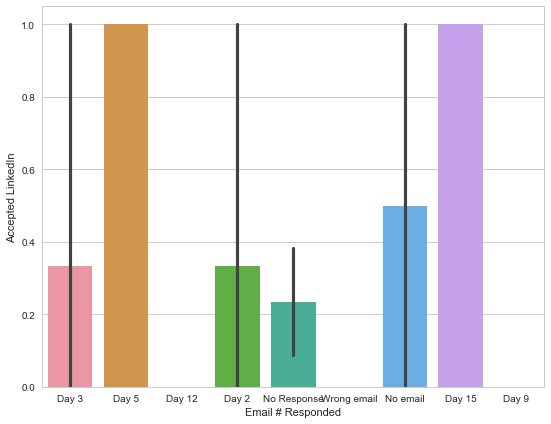

In [70]:
#bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x="Email # Responded", y="Accepted LinkedIn", data=sales)
#resize
sns.set(rc={'figure.figsize':(12, 10)})

In this graph we can visualize the results reported above. It is more likely that someone who has accepted a LinkedIn invitation will respond on Day 5 or 15. It is the least likely that they will respond on Day 9 or 12. Although we do see these results it would be wise to gain a bigger data set because these results may not be representative of the population we are looking at.